# 01 - PyTorch datasets and transforms

#### Introductory note 

These tutorials are inspired by the book "[Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)" by Stevens et al. They can be seen as a summary of the part I of book regarding PyTorch itself. Normally, following the tutorials should be enough and reading the book is not required. But of course, if you are interested and curious you can try to follow the book while reading these tutorials. I tried to associate the most important part of these tutorials with their respective book sections. Some other parts of the tutorials have been done from scratch or inspired by the PyTorch documentation. If you have any questions, you can ask me (Natacha), it could help me improve these tutorials and / or help other students who are struggling as much as you are. 

These tutorials are a "bonus", they are not mandatory and are not graded (there is nothing to do anyway, just read and run). They are just here to help you if you are new to PyTorch and to help you save some time by not reading the book (or at least less intensively). 

In short: To understand deep learning concepts, the number one priority is Andrew's course. To understand PyTorch, the priority is the documentation (always), these tutorials and if it's still not enough, don't be afraid of trying to find good tutorials on the internet, there are plenty of them and you can share them with other students (and with us) if you find some really good ones.

## Contents

1. The CIFAR Dataset

  1.1. Loading the CIFAR dataset in Pytorch  
  1.2. Getting started with the CIFAR dataset  
  1.3. Plot images  
  
2. Transforms

  2.1 Convert an image into a PyTorch-friendly object  
  2.2 Include the preprocessing step (transform operator) when loading the dataset  
  2.3 Normalizing the dataset  

  


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import datasets
from torchvision import transforms

torch.manual_seed(123)

## 1. The CIFAR Dataset

Quoting  the [Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf) book:

> CIFAR-10 consists of 60,000 tiny 32 × 32 color (RGB) images, labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9). Nowadays, CIFAR-10 is considered too simple for developing or validating new research, but it serves our learning purposes just fine.

CIFAR is one of the datasets available in PyTorch (see [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision-datasets))

As written in the PyTorch documentation:

> All datasets are subclasses of [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) i.e, they have ``__getitem__`` and ``__len__`` methods implemented. Hence, they can all be passed to a [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which can load multiple samples parallelly

These might make things even more confusing first but we will see in this notebook that manipulating PyTorch datasets is actually really simple

### 1.1 Loading the CIFAR dataset in Pytorch

In [2]:
# Where to find the data or where to download the data if not found
data_path = 'data/'

# Instantiates a dataset for the training data and downloads the data if it is not present
cifar10_train = datasets.CIFAR10(
    data_path,       # location from which the data will be downloaded
    train=True,      # says whether we’re interested in the training set or the validation set
    download=True,   # says whether we allow PyTorch to download the data if not found in 'data_path'
    )

print("Size of the training dataset", len(cifar10_train))

Files already downloaded and verified
Size of the training dataset 50000


In [3]:
# Same with validation dataset
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) 
print("Size of the validation dataset", len(cifar10_val))

Files already downloaded and verified
Size of the validation dataset 10000


### 1.2 Getting started with the CIFAR dataset

From now on we will try to answer the following questions:

1. How to access the elements in this dataset? 
1. What do these elements look like in python?
1. How to plot the images?
1. How to manipulate them in order to feed our neural network with them? 

In [4]:

print("Type of the CIFAR dataset in PyTorch    :  ", type(cifar10_train))
i = 99
i_elt = cifar10_train[i]
# Type of the ith element of the training dataset: 
print("Type of the ith element in the dataset  :  ", type(i_elt))
print("Tuple length of this element            :  ", len(i_elt))
print("Type of the 1st element of the tuple    :  ", type(i_elt[0]))
print("Type of the 2nd element of the tuple    :  ", type(i_elt[1]))

# The dataset is then made like this "i_img, i_label =  cifar10_train[i]""
print("")
img, label = cifar10_train[i]
print("Size of the image: ", img.size)

Type of the CIFAR dataset in PyTorch    :   <class 'torchvision.datasets.cifar.CIFAR10'>
Type of the ith element in the dataset  :   <class 'tuple'>
Tuple length of this element            :   2
Type of the 1st element of the tuple    :   <class 'PIL.Image.Image'>
Type of the 2nd element of the tuple    :   <class 'int'>

Size of the image:  (32, 32)


### 1.3 Plot images

Image <PIL.Image.Image image mode=RGB size=32x32 at 0x7F2D803B3A90>
(32, 32, 3)
[[ 62  64  44]
 [ 50  50  26]
 [ 46  44  19]
 [ 49  49  21]
 [ 59  59  22]
 [ 58  57  26]
 [ 58  59  30]
 [ 52  52  23]
 [ 57  56  23]
 [ 54  51  17]
 [ 59  55  30]
 [ 60  55  31]
 [ 65  61  38]
 [ 82  80  61]
 [ 98  94  85]
 [ 53  49  25]
 [ 53  48  19]
 [ 94  87  63]
 [150 134 121]
 [ 99  87  67]
 [ 75  61  23]
 [ 85  68  28]
 [111  81  49]
 [122 101  82]
 [168 160 116]
 [154 153 100]
 [113 120  46]
 [137 143  59]
 [160 162  72]
 [167 172  69]
 [183 184  76]
 [137 136  72]]


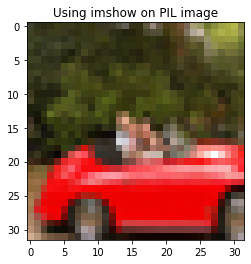

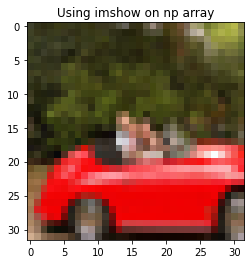

In [5]:
print("Image", img)      # Print does not plot the image nor its elements
img_as_array = np.array(img)  # Convert the image into a numpy array
print(img_as_array.shape)    
print(img_as_array[0])  # Print the pixel values of the first element of this multi-dimensional array
#plt.plot(img)          # This gives an error
plt.imshow(img)         # This work :) 
plt.title("Using imshow on PIL image")

plt.figure()
plt.imshow(img_as_array)
plt.title("Using imshow on np array")
plt.show()

#### Plot one instance of each of the 10 classes of images in the CIFAR-10 dataset

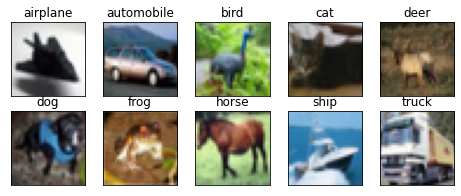

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    # Find an image in the dataset with the right label
    img = next(img for img, label in cifar10_train if label == i)
    plt.imshow(img)
plt.show()

## 2. Transforms

### 2.1 Convert an image into a PyTorch-friendly object

Now we know how to plot CIFAR images and how to convert them into numpy arrays. 
But, as we have already seen the "PyTorch-friendly objects" are the PyTorch tensors. We can easily transform numpy arrays and PIL images into tensors using the toTensor transform (see [torchvision.transforms.ToTensor](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor)) 

Warning: as mentioned in the documentation, this transform implictly:

1. Reshape a (H x W x C) np array into a (C x H x W) tensor (High, Width, Channel (color))
2. Rescale ``[0 255]`` int arrays into ``[0 1]`` float tensors



<class 'numpy.ndarray'>
Shape of the image as a numpy array  :  (32, 32, 3)
<class 'torch.Tensor'>
Shape of the image as a tensor       :  torch.Size([3, 32, 32])

 tensor([[0.6039, 0.4941, 0.4118,  ..., 0.3569, 0.3412, 0.3098],
        [0.5490, 0.5686, 0.4902,  ..., 0.3765, 0.3020, 0.2784],
        [0.5490, 0.5451, 0.4510,  ..., 0.3098, 0.2667, 0.2627],
        ...,
        [0.6863, 0.6118, 0.6039,  ..., 0.1647, 0.2392, 0.3647],
        [0.6471, 0.6118, 0.6235,  ..., 0.4039, 0.4824, 0.5137],
        [0.6392, 0.6196, 0.6392,  ..., 0.5608, 0.5608, 0.5608]])


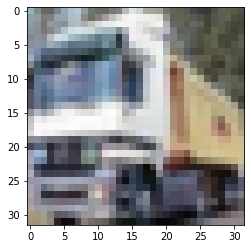

In [7]:
img_np = np.array(img)
print(type(img_np))
print('Shape of the image as a numpy array  : ', img_np.shape)
# Instanciate a ToTensor transform
to_tensor = transforms.ToTensor()
# Apply it to our PIL image
img_t = to_tensor(img)
print(type(img_t)) 
print('Shape of the image as a tensor       : ', img_t.shape)
print("\n",img_t[0])    # Now values are within [0 1] range

#plt.imshow(img_t)   #Does not work because the shape has changed!
plt.imshow(img_t.permute(1, 2, 0))  # This works :) 

### 2.2 Include the preprocessing step (transform operator) when loading the dataset

We can directly convert the images into tensors when loading a dataset from the [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision-datasets) module as they all have a ``transform`` parameter. For example with the CIFAR it looks like this:

In [8]:
tensor_cifar10_train = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

### 2.3 Normalizing the dataset

In machine learning we almost always do some preprocessing such as normalizing the data before using it as input. 

The [torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision-transforms) module can easily performs the most common image transformations such as [resize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize), [normalize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize), etc. 

In addition, this module allows us to quickly define pipelines of basic preprocessing functions using the [transforms.Compose](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) method.

Thus in the following cell we define the pre-processing transformations that will be used on our input images.

In [9]:
# Stack all the images in the dataset in one big tensor (Warning! This might take a while!)
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10_train], dim=3)
print(imgs.shape)

torch.Size([3, 32, 32, 50000])


In [10]:
# Recall that view(3, -1) keeps the three channels and
# merges all the remaining dimensions into one, figuring
# out the appropriate size. Here our 3 × 32 × 32 image is
# transformed into a 3 × 1,024 vector, and then the mean
# is taken over the 1,024 elements of each channel.
 
# Instanciate a normalize transform 
# using the mean and standard deviation of our dataset
normalizer = transforms.Normalize(
    imgs.view(3, -1).mean(dim=1), 
    imgs.view(3, -1).std(dim=1)
    )

In [11]:
transformed_cifar10_train = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        normalizer,
    ]))

transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        normalizer,
    ]))

That's it! Now our datasets are of the right type and normalized!

We can still plot the images but since their pixel values are now normalized they will of course look a bit different. Note that matplotlib understands that the pixels values are within the ``[0..1]`` range

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


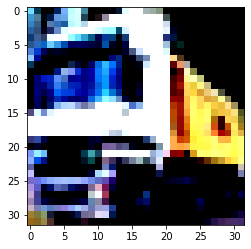

In [12]:
img_t, _ = transformed_cifar10_train[1]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()